Select exercises from https://www.udemy.com/draft/1224174/?couponCode=CLUSTER-NBS 

https://github.com/benjaminwilson/python-clustering-exercises

# Grain seeds
Predict the type of grain by seed characteristics

In [1]:
import pandas as pd

In [2]:
seeds_df = pd.read_csv('./data/seeds.csv')
varieties = list(seeds_df['grain_variety'])
del seeds_df['grain_variety']

In [3]:
seeds_df.head()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


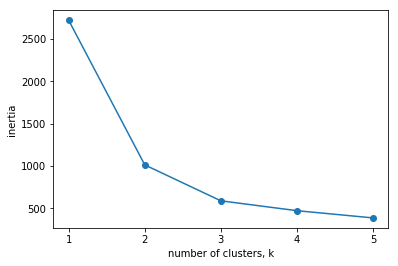

In [4]:
samples = seeds_df.values


from sklearn.cluster import KMeans

ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(samples)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
import matplotlib.pyplot as plt
%matplotlib inline
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


Using three clusters

In [5]:
model = KMeans(n_clusters=3)
labels = model.fit_predict(samples)

In [6]:
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

In [7]:
ct = pd.crosstab(df['labels'], df['varieties'])
ct

varieties,Canadian wheat,Kama wheat,Rosa wheat
labels,,,
0,2,60,10
1,0,1,60
2,68,9,0


# Fish
Predict fish species

In [19]:
df = pd.read_csv('./data/fish.csv')
species = list(df['species'])
del df['species']
print(df.head())

   weight  length1  length2  length3  height  width
0   242.0     23.2     25.4     30.0    38.4   13.4
1   290.0     24.0     26.3     31.2    40.0   13.8
2   340.0     23.9     26.5     31.1    39.8   15.1
3   363.0     26.3     29.0     33.5    38.0   13.3
4   430.0     26.5     29.0     34.0    36.6   15.1


In [9]:
samples = df.values

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
kmeans = KMeans(n_clusters=4)
pipeline = make_pipeline(scaler, kmeans)

In [10]:
pipeline.fit(samples)
labels = pipeline.predict(samples)
labels.shape

(85,)

In [11]:
df = pd.DataFrame({'labels': labels, 'species': species})

In [12]:
ct = pd.crosstab(df['labels'], df['species'])
ct

species,Bream,Pike,Roach,Smelt
labels,,,,
0,0,0,0,13
1,33,0,1,0
2,0,17,0,0
3,1,0,19,1


# Stocks
Find out which stocks move together

In [2]:
import pandas as pd
fn = './data/stocks.csv'
stocks_df = pd.read_csv(fn, index_col=0)

In [11]:
companies = list(stocks_df.index)
movements = stocks_df.values

from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

normalizer = Normalizer()
kmeans = KMeans(n_clusters=14)
pipeline = make_pipeline(normalizer, kmeans)
pipeline.fit(movements)

Pipeline(steps=[('normalizer', Normalizer(copy=True, norm='l2')), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=14, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [12]:
labels = pipeline.predict(movements)

In [13]:
df = pd.DataFrame({'labels': labels, 'companies': companies})

In [14]:
df.sort_values('labels')

,companies,labels
39,Pfizer,0
25,Johnson & Johnson,0
46,Sanofi-Aventis,0
48,Toyota,1
45,Sony,1
7,Canon,1
21,Honda,1
34,Mitsubishi,1
24,Intel,2
33,Microsoft,2
